In [46]:
%load_ext autoreload
%autoreload 2
import numpy as np
from astropy import units as u
import emcee
from matplotlib import pyplot as plt

from load_galweight_data import load_clusters
from cluster import temp_from_vdisp
from statistics_functions import log_likelihood, chi_squared

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# get dataset
clusters, variances = load_clusters(nrows=20)

In [13]:
T_data = [temp_from_vdisp(c.vel_disp) for c in clusters]
T_data

[<Quantity 1.13369052e-05 GeV>,
 <Quantity 8.96643311e-06 GeV>,
 <Quantity 9.07989976e-06 GeV>,
 <Quantity 8.10745427e-06 GeV>,
 <Quantity 7.41285088e-06 GeV>,
 <Quantity 8.20368656e-06 GeV>,
 <Quantity 8.22529573e-06 GeV>,
 <Quantity 7.72504935e-06 GeV>,
 <Quantity 7.33483838e-06 GeV>,
 <Quantity 6.21106042e-06 GeV>,
 <Quantity 7.48240004e-06 GeV>,
 <Quantity 7.2500303e-06 GeV>,
 <Quantity 7.74834976e-06 GeV>,
 <Quantity 8.05491993e-06 GeV>,
 <Quantity 5.92439129e-06 GeV>,
 <Quantity 5.61144568e-06 GeV>,
 <Quantity 5.38610788e-06 GeV>,
 <Quantity 3.24632308e-06 GeV>,
 <Quantity 4.88330641e-06 GeV>,
 <Quantity 5.85577809e-06 GeV>]

In [31]:
s0_test = -20
m_chi = 1e-4 * u.GeV
T_pred = [c.pred_T_b_small_m(s0_test, m_chi) for c in clusters]
T_pred

[<Quantity 1.2062311e-05 GeV>,
 <Quantity 1.06336251e-05 GeV>,
 <Quantity 1.05463385e-05 GeV>,
 <Quantity 9.87470416e-06 GeV>,
 <Quantity 1.08453508e-05 GeV>,
 <Quantity 7.76856326e-06 GeV>,
 <Quantity 1.02795101e-05 GeV>,
 <Quantity 7.95240353e-06 GeV>,
 <Quantity 7.9815942e-06 GeV>,
 <Quantity 1.02311371e-05 GeV>,
 <Quantity 9.60659739e-06 GeV>,
 <Quantity 9.36130457e-06 GeV>,
 <Quantity 9.85979831e-06 GeV>,
 <Quantity 9.10104673e-06 GeV>,
 <Quantity 8.59056707e-06 GeV>,
 <Quantity 8.3565192e-06 GeV>,
 <Quantity 8.96492961e-06 GeV>,
 <Quantity 9.0063621e-06 GeV>,
 <Quantity 9.09915411e-06 GeV>,
 <Quantity 8.83047983e-06 GeV>]

In [32]:
chi_squared(T_pred, T_data, variances)

<Quantity 10415.506288>

In [33]:
log_likelihood(s0_test, m_chi, T_data, variances, clusters)

<Quantity -5207.753144>

In [55]:
# initialize mcmc
ndim, nwalkers = 1, 5
log_sigma0 = np.random.uniform(low=-50, high=-20, size=(nwalkers, ndim))
log_sigma0

array([[-22.41819029],
       [-23.47304349],
       [-34.13476409],
       [-48.52648471],
       [-26.92375037]])

In [56]:
m_chi = 1e-4 * u.GeV
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood, args=[m_chi, T_data, variances, clusters])

In [57]:
state = sampler.run_mcmc(log_sigma0, 100, progress=True)
sampler.reset()

You must install the tqdm library to use progress indicators with emcee


In [58]:
sampler.run_mcmc(state, 500, progress=True)

You must install the tqdm library to use progress indicators with emcee


State([[-19.62284038]
 [-19.62309073]
 [-19.62329822]
 [-19.62413383]
 [-19.62322367]], log_prob=[-1187.37865622 -1187.43475621 -1187.48320972 -1187.69632041
 -1187.46559693], blobs=[], random_state=('MT19937', array([3917198138, 3397872010, 3617802956,  675794524, 1034947145,
       1220763846, 1469438136, 2297716777, 4266537175, 2720413587,
       2394133280,  329495152,   38987511, 3990247796, 1752793941,
        665620263, 3266325677, 3470877419,  478471320,  999014583,
       3513500327, 3178525830, 4221538505, 3900462673, 3533460114,
       1526025655, 3252315687, 2886454505, 3315210411, 1759491424,
       2510375168, 2322860402, 3914342978, 1500615914, 2601389081,
       2612210580,  785952519, 3107144463,  645197113, 3595947312,
        254937114, 2490639556, 3210298121, 2778753334, 1360454294,
        135354106, 3891862778,  282088616, 3747884137, 2700449301,
       3090320583, 3476624698, 3333726329, 1030959947,  914689722,
        105590635, 2706247038, 1684633214, 177877393

In [62]:
samples = sampler.get_chain(flat=True)
samples

array([[-19.62065162],
       [-19.62670413],
       [-19.6195585 ],
       ...,
       [-19.62329822],
       [-19.62413383],
       [-19.62322367]])

Text(0.5, 0, 'log(sigma0)')

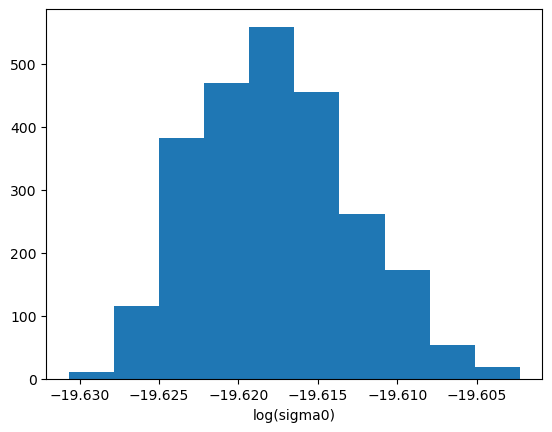

In [66]:
plt.hist(samples)
plt.xlabel('log(sigma0)')

In [64]:
np.median(samples)

-19.61776759900331